<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/BeltExam3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, \
confusion_matrix
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras import losses
from keras import metrics
from keras import models
from keras import layers

### **Part 1 Clustering**

**Data Exploration and Cleansing**

In [2]:
#import data
df1 = pd.read_csv('/content/Option_B_clustering - Option_B_clustering.csv')
df1.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


In [3]:
#check info about data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


In [4]:
#check duplicates
duplicates = df1.duplicated().sum()
if duplicates > 0:
  print('Our data has duplicates that need to be cleaned')

Our data has duplicates that need to be cleaned


In [5]:
#remove duplicates
df1.drop_duplicates(inplace=True)

In [6]:
#confirm duplicates have been removed
duplicates1 = df1.duplicated().sum()
if duplicates1 == 0:
  print('There are no more duplicates in our data')

There are no more duplicates in our data


In [7]:
#check data info after removing duplicates
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12730 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12730 non-null  int64
 1   highest_education     12730 non-null  int64
 2   imd_band              12730 non-null  int64
 3   age_band              12730 non-null  int64
 4   num_of_prev_attempts  12730 non-null  int64
 5   studied_credits       12730 non-null  int64
 6   disability            12730 non-null  int64
 7   passed_course         12730 non-null  int64
 8   assess_score_1        12730 non-null  int64
 9   assess_score_2        12730 non-null  int64
 10  assess_score_3        12730 non-null  int64
 11  assess_score_4        12730 non-null  int64
 12  assess_score_5        12730 non-null  int64
dtypes: int64(13)
memory usage: 1.4 MB


In [8]:
#check null values
df1.isnull().sum()

gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
passed_course           0
assess_score_1          0
assess_score_2          0
assess_score_3          0
assess_score_4          0
assess_score_5          0
dtype: int64

There are no null values

**Preparing the Dataset for Modeling and Model Analysis**

In [9]:
#feature engineer an extra column to get average assess_score for each student
df1['average_score'] = df1[['assess_score_1', 'assess_score_2', 'assess_score_3', 'assess_score_4', 'assess_score_5']].mean(axis=1)

In [10]:
#scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

In [11]:
#fit the Kmeans algo
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

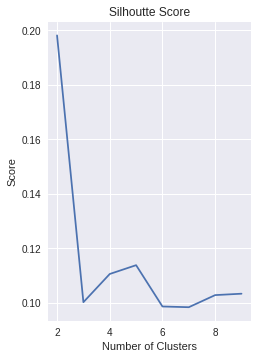

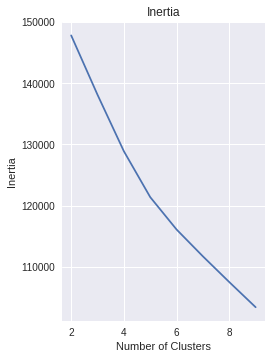

In [12]:
#Visualizing silhouette score and inertia for kmeans
score_km = [] #list to store silhoutte score
ini_km = [] #list to store intertia score
k_range = range(2, 10)
for i in k_range:
  kmeans_m = KMeans(n_clusters=i)
  kmeans_m.fit(scaled_data)
  score_km.append(silhouette_score(scaled_data, kmeans_m.labels_))
  ini_km.append(kmeans_m.inertia_)

#visualize scores

plt.style.use('seaborn')

plt.subplot(1,2,1)
plt.plot(range(2, 10), score_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhoutte Score')
plt.show()

plt.subplot(1,2,2)
plt.plot(range(2, 10), ini_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia')
plt.show()

From the visualization, highest silhouette score for kmeans seems to be when n_clusters = 2. Furthermore, the inertia seems to slighlty level-off (or we have an 'elbow') when n_cluster = 4. I'll therefore go with n_clusters = 2 for my best kmeans model to maximize the silhouette score.

In [13]:
#refit model with n_cluster = 2
km = KMeans(n_clusters=2, random_state=42)
km.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [14]:
#create a column for the cluster labels in the dataset
df1['cluster'] = km.labels_ 

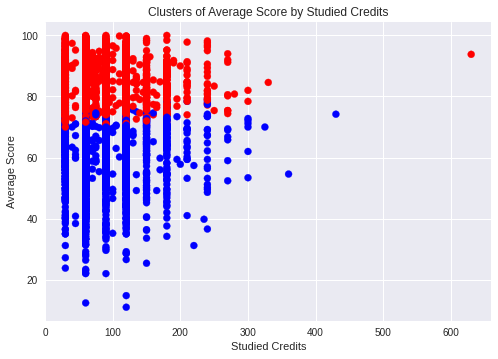

In [15]:
#Generate visualization to see the clusters based on Average Score and Studied Credit
colors = {0: 'blue', 1: 'red'}
plt.scatter(df1['studied_credits'], df1['average_score'], c = df1['cluster'].map(colors))
plt.ylabel('Average Score')
plt.xlabel('Studied Credits')
plt.title('Clusters of Average Score by Studied Credits')
plt.show()

From the visualization above, it seems the students in cluster 1 (red dots) have average minimum score of above 70 irrespective of amount of studied credit and students in cluster (blue dots) have an average maximum score below 70, irrespecive of studied credits.

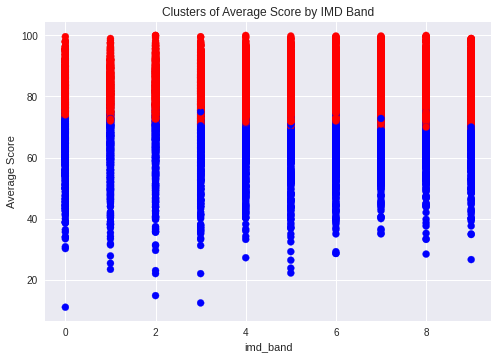

In [16]:
#Generate visualization to see the clusters based on Average Score and IMD Band
plt.scatter(df1['imd_band'], df1['average_score'], c = df1['cluster'].map(colors))
plt.ylabel('Average Score')
plt.xlabel('imd_band')
plt.title('Clusters of Average Score by IMD Band')
plt.show()

From the visualization above, it seems the students in cluster 1 (red dots) have average minimum score of above 70 irrespective of IMD band and students in cluster 0 (blue dots) have an average maximum score below 70, irrespective of IMD Band. It seems the average score is important in understanding the cluster. I'll generate a scatterplot of the average score for each cluster to validate.

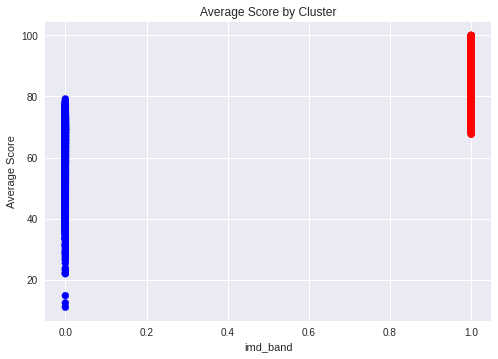

In [17]:
plt.scatter(df1['cluster'], df1['average_score'], c = df1['cluster'].map(colors))
plt.ylabel('Average Score')
plt.xlabel('imd_band')
plt.title('Average Score by Cluster')
plt.show()

The above plot shows a higher range in the average score for students in cluster 0 (blue dots) than for students in cluster 1 (red dots). However, there's also an overlap of average score between the 2 clusters. Given this overlap in average score, it would be interesing for instance (as a further study) to understand the conditions behind why some students from a deprived neighboorhoods have comparable high average score with students from more privileged neighborhoods. Such a study might reveal intevention programs that might help improve the average score of students from deprived neighborhoods.

### **Part 2: Modeling**

**Data Exploration and Processing**

In [18]:
df2 = pd.read_csv('/content/Option_B_modeling.csv')
df2.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_submitted_1,assess_submitted_2,assess_submitted_3,assess_submitted_4,assess_submitted_5,assess_submitted_6,assess_score_6,assess_submitted_7,assess_score_7,assess_submitted_8,assess_score_8,assess_submitted_9,assess_score_9,assess_submitted_10,assess_score_10,assess_submitted_11,assess_score_11,assess_submitted_12,assess_score_12,assess_submitted_13,assess_score_13,assess_submitted_14,assess_score_14,sum_activities_-25,sum_click_-25,activities_x_clicks_-25,sum_activities_-24,...,sum_activities_260,sum_click_260,activities_x_clicks_260,sum_activities_261,sum_click_261,activities_x_clicks_261,sum_activities_262,sum_click_262,activities_x_clicks_262,sum_activities_263,sum_click_263,activities_x_clicks_263,sum_activities_264,sum_click_264,activities_x_clicks_264,sum_activities_265,sum_click_265,activities_x_clicks_265,sum_activities_266,sum_click_266,activities_x_clicks_266,sum_activities_267,sum_click_267,activities_x_clicks_267,sum_activities_268,sum_click_268,activities_x_clicks_268,module_0,module_AAA,module_BBB,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,80.0,85.0,82.0,-1.0,-1.0,-2.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,70.0,64.0,60.0,3.0,-2.0,4.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,74.0,88.0,75.0,-2.0,-3.0,-2.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,63.0,35.0,75.0,7.0,21.0,7.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,62.0,75.0,68.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [19]:
#split data into X and y variables
X = df2.drop(columns=['passed_course'])
y = df2['passed_course']

In [20]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#convert data to numpy arrays so as to be able to feed it into a neural network
my_data = (X_train, X_test, y_train, y_test)
for i in my_data:
  i = i.to_numpy()

In [22]:
#instantiate standard scaler and scale date
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#instantiate and fit PCA to leverage components that explains 95% of the variance in the data
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
#get number of components after PCA
print('Number of components after PCA is', X_train.shape[1])

Number of components after PCA is 493


**Modeling**

In [25]:
#Plotting model performance for evaluation. Code adapted from class material of week 11
def plot_history(history, metric=None):
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = 'train')
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].set_xlabel('epochs')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].set_xlabel('epochs')
    axes[1].legend()

  plt.show()

Model 1

In [26]:
#define model
model1 = Sequential()

#instantiate input shape
input_shape = X_train.shape[1]

In [27]:
#define model architecture. 
model1.add(layers.Dense(32, 
                       activation='relu',
                       input_shape=(input_shape,)))
model1.add(layers.Dense(16,
                       activation='relu'))
model1.add(layers.Dense(16,
                       activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [28]:
#compile model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [29]:
#fit model
history = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50)

Epoch 1/50
319/319 [==============================] - 2s 3ms/step - loss: 0.4279 - acc: 0.8116 - val_loss: 0.3625 - val_acc: 0.8638
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 0.2927 - acc: 0.8799 - val_loss: 0.3501 - val_acc: 0.8638
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.2428 - acc: 0.9042 - val_loss: 0.3683 - val_acc: 0.8642
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.2071 - acc: 0.9190 - val_loss: 0.3939 - val_acc: 0.8717
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.1777 - acc: 0.9319 - val_loss: 0.4545 - val_acc: 0.8528
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.1548 - acc: 0.9421 - val_loss: 0.4755 - val_acc: 0.8540
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.1243 - acc: 0.9530 - val_loss: 0.5591 - val_acc: 0.8509
Epoch 8/50
319/319 [==============================] - 1s 3ms/step - loss: 0.

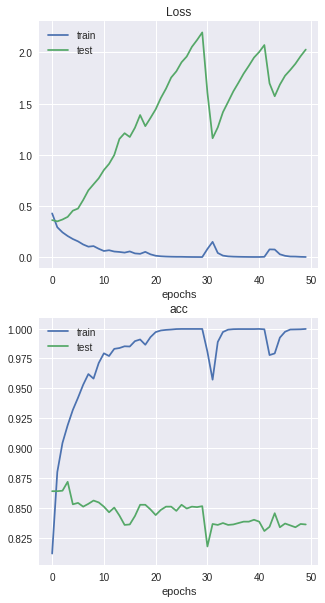

In [30]:
#evaluate how Model 1 is doing 
plot_history(history, 'acc')

From the plot above, the model is badly overfitting. At right about 30 epochs, it seems training accuracy seems to peak, and training loss seems to flatten.







Model 2

For model 2: I'll reduce the model complexity by dropping a layer and training for 30 epochs.

In [31]:
#define model
model2 = Sequential()

In [32]:
#define model architecture. 
model2.add(layers.Dense(64, 
                       activation='relu',
                       input_shape=(input_shape,)))
model2.add(layers.Dense(64,
                       activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [33]:
#compile model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [34]:
#fit Model 2 with 30 epochs
history_2 = model2.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30)

Epoch 1/30
319/319 [==============================] - 1s 3ms/step - loss: 0.3967 - acc: 0.8371 - val_loss: 0.3679 - val_acc: 0.8642
Epoch 2/30
319/319 [==============================] - 2s 5ms/step - loss: 0.2738 - acc: 0.8899 - val_loss: 0.3564 - val_acc: 0.8662
Epoch 3/30
319/319 [==============================] - 1s 4ms/step - loss: 0.2265 - acc: 0.9112 - val_loss: 0.3717 - val_acc: 0.8650
Epoch 4/30
319/319 [==============================] - 1s 3ms/step - loss: 0.1835 - acc: 0.9286 - val_loss: 0.4098 - val_acc: 0.8673
Epoch 5/30
319/319 [==============================] - 1s 3ms/step - loss: 0.1492 - acc: 0.9428 - val_loss: 0.4783 - val_acc: 0.8469
Epoch 6/30
319/319 [==============================] - 1s 3ms/step - loss: 0.1165 - acc: 0.9586 - val_loss: 0.5277 - val_acc: 0.8513
Epoch 7/30
319/319 [==============================] - 1s 2ms/step - loss: 0.0908 - acc: 0.9681 - val_loss: 0.6532 - val_acc: 0.8599
Epoch 8/30
319/319 [==============================] - 1s 3ms/step - loss: 0.

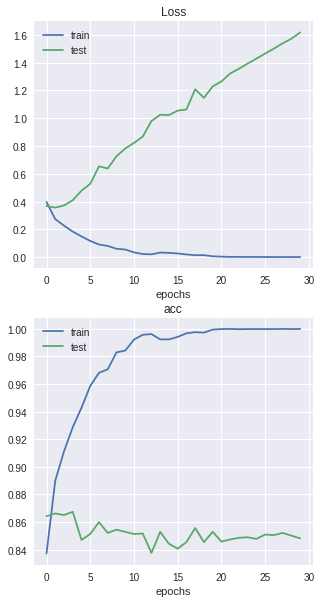

In [35]:
#evaluate how Model 2 is doing 
plot_history(history_2, 'acc')

Based on the plot above, the model is still overfitting.

Model 3

For model 3, I will add a droupout layer

In [36]:
#define model
model3 = Sequential()

In [37]:
#define model architecture. 
model3.add(layers.Dense(16, 
                       activation='relu',
                       input_shape=(input_shape,)))
model3.add(Dropout(.2))
model3.add(layers.Dense(16,
                       activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [38]:
#compile model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [39]:
#fit model 3
history_3 = model3.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30)
                    

Epoch 1/30
319/319 [==============================] - 1s 3ms/step - loss: 0.4947 - acc: 0.7909 - val_loss: 0.3887 - val_acc: 0.8485
Epoch 2/30
319/319 [==============================] - 1s 2ms/step - loss: 0.3574 - acc: 0.8566 - val_loss: 0.3568 - val_acc: 0.8583
Epoch 3/30
319/319 [==============================] - 1s 3ms/step - loss: 0.3162 - acc: 0.8716 - val_loss: 0.3582 - val_acc: 0.8611
Epoch 4/30
319/319 [==============================] - 1s 3ms/step - loss: 0.2888 - acc: 0.8826 - val_loss: 0.3650 - val_acc: 0.8607
Epoch 5/30
319/319 [==============================] - 1s 2ms/step - loss: 0.2753 - acc: 0.8847 - val_loss: 0.3700 - val_acc: 0.8607
Epoch 6/30
319/319 [==============================] - 1s 2ms/step - loss: 0.2607 - acc: 0.8912 - val_loss: 0.3776 - val_acc: 0.8626
Epoch 7/30
319/319 [==============================] - 1s 2ms/step - loss: 0.2524 - acc: 0.8934 - val_loss: 0.3822 - val_acc: 0.8642
Epoch 8/30
319/319 [==============================] - 1s 3ms/step - loss: 0.

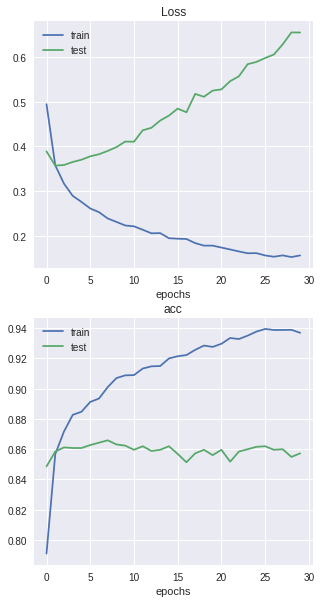

In [40]:
#evaluate how Model 3 is doing 
plot_history(history_3, 'acc')

Model 3 is overfitting lesser than models 1 and 2. Although model 3 can still be improved, we will choose it for the evaluation.

Evaluation

Training Scores
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2401
           1       0.97      0.99      0.98      7788

    accuracy                           0.97     10189
   macro avg       0.97      0.95      0.96     10189
weighted avg       0.97      0.97      0.97     10189



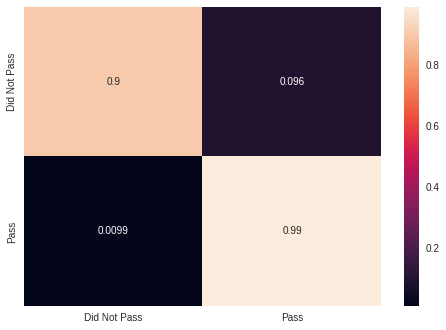



Testing Scores
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       616
           1       0.89      0.93      0.91      1932

    accuracy                           0.86      2548
   macro avg       0.82      0.78      0.79      2548
weighted avg       0.85      0.86      0.85      2548



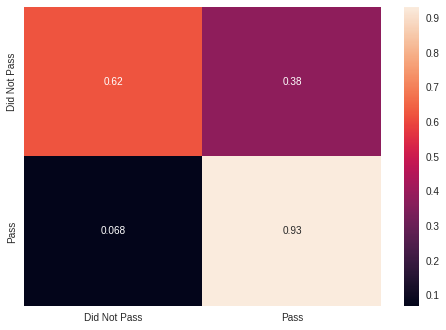

In [41]:
# Make predicitons and evaluate model 3: Code adapted from class note book from week 11
print('Training Scores')

# Define labels for the confusion matrix
labels = ['Did Not Pass', 'Pass']

# Get training predictions and round them to integers instead of floats
train_preds = np.rint(model3.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds = np.rint(model3.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()


Summary and Model Performance

The model has an average accuracy of 85%. However, it performs better in predicting students that will pass than in predicting students that will fail (based on the precisioin and recall scores). The recommendation would be to try and improve the performance of the model (by further tuning) before deploying to production.